### 1. Image Resizing using OpenCV

Original Dimensions :  (1603, 2400, 3)


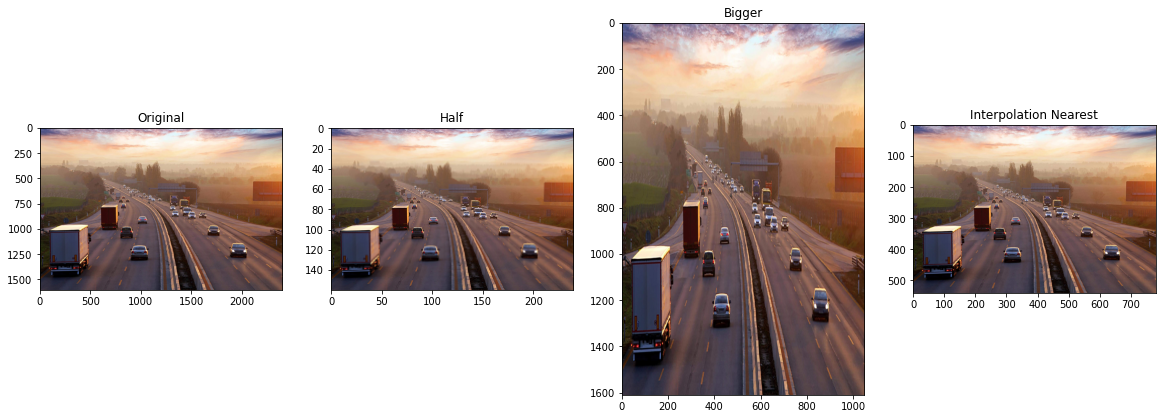

In [20]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline

# cv2.imread(path, flag)
img = cv2.imread("Images/road.jpg") 

# convert image from BGR format to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('Original Dimensions : ',img.shape)

# cv2.resize(src, dsize, dst, fx, fy, interpolation)
half = cv2.resize(img, (0, 0), fx = 0.1, fy = 0.1, interpolation = cv2.INTER_AREA) 

bigger = cv2.resize(img, (1050, 1610), interpolation = cv2.INTER_NEAREST) 
  
stretch_near = cv2.resize(img, (780, 540), interpolation = cv2.INTER_NEAREST) 

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,20))
ax1.set_title('Original')
ax1.imshow(img)
ax2.set_title('Half')
ax2.imshow(half)
ax3.set_title('Bigger')
ax3.imshow(bigger)
ax4.set_title('Interpolation Nearest')
ax4.imshow(stretch_near)

### 2. Scaling an Image
 
   - Scaling operation increases/reduces size of an image.

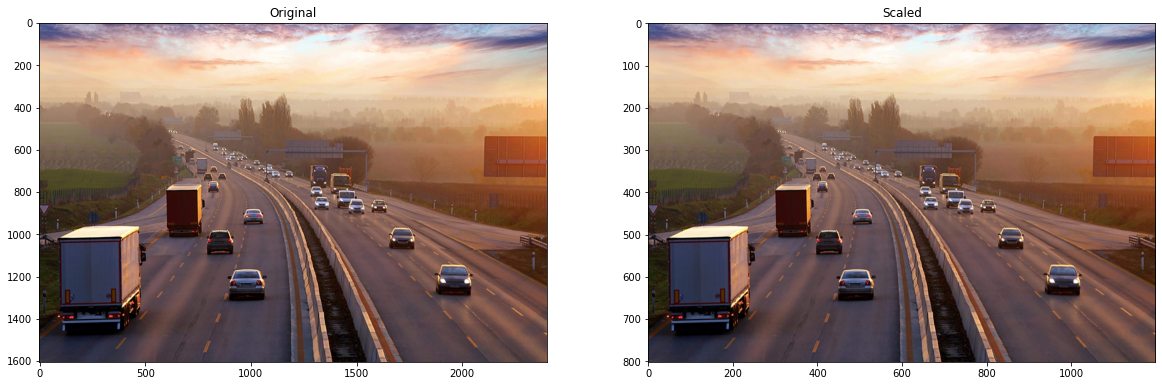

In [28]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline  

FILE_NAME = 'Images/road.jpg'
try: 
    # Read image from disk. 
    img = cv2.imread(FILE_NAME) 
    
    # convert image from BGR format to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get number of pixel horizontally and vertically. 
    (height, width) = img.shape[:2] 
  
    # Specify the size of image along with interploation methods. 
    # cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC is used for zooming. 
    # # cv2.resize(src, dsize, dst, fx, fy, interpolation)
    res = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation = cv2.INTER_AREA) 
  
    # Write image back to disk. 
    # cv2.imwrite('result.jpg', res) 
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
    ax1.set_title('Original')
    ax1.imshow(img)
    ax2.set_title('Scaled')
    ax2.imshow(res)
except IOError: 
    print ('Error while reading files !!!') 

### 3. Rotating an image

   - Images can be rotated to any degree clockwise or otherwise.
   - We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor.

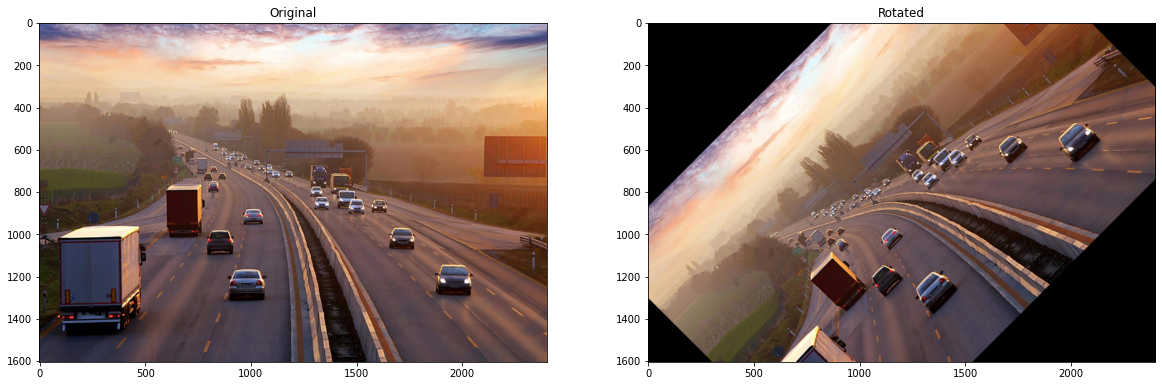

In [7]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline  

  
FILE_NAME = 'Images/road.jpg'
try: 
    # Read image from the disk. 
    img = cv2.imread(FILE_NAME) 

    # convert image from BGR format to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
    # Shape of image in terms of pixels. 
    (rows, cols) = img.shape[:2] 
  
    # getRotationMatrix2D creates a matrix needed for transformation. 
    # We want matrix for rotation w.r.t center to 45 degree without scaling.
    # cv2.getRotationMatrix2D(center, angle, scale)
    '''
     The function calculates the following matrix:

       [α   β   (1−α)⋅center.x−β⋅center.y
       -β  α   β⋅center.x+(1−α)⋅center.y]

     where: α = scale⋅cos(angle), β = scale⋅sin(angle)
    '''
    matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1) 
    
    # cv2.warpAffine(src, Matrix, dsize, dst, flags, borderMode, borderValue)
    res = cv2.warpAffine(img, matrix, (cols, rows)) 
  
    # Write image back to disk. 
    # cv2.imwrite('result.jpg', res) 
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
    ax1.set_title('Original')
    ax1.imshow(img)
    ax2.set_title('Rotated')
    ax2.imshow(res)
    
except IOError: 
    print ('Error while reading files !!!') 

### 4. Translating an Image
 
   - Translating an image means shifting it within a given frame of reference.

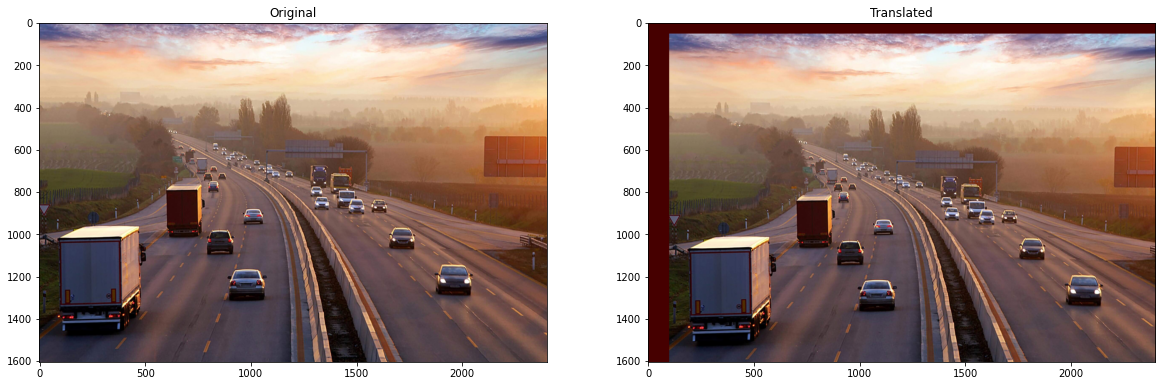

In [15]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline 
  
FILE_NAME = 'Images/road.jpg'
# Create translation matrix. 
# If the shift is (x, y) then matrix would be 
# M = [1 0 x] 
#     [0 1 y] 
# Let's shift by (100, 50). 
matrix = np.float32([[1, 0, 100], [0, 1, 50]]) 
  
try: 
  
    # Read image from disk. 
    img = cv2.imread(FILE_NAME) 
    
    # convert image from BGR format to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    (rows, cols) = img.shape[:2] 
  
    # warpAffine does appropriate shifting given the 
    # translation matrix. 
    # cv2.warpAffine(src, Matrix, dsize, dst, flags, borderMode, borderValue)
    res = cv2.warpAffine(img, matrix, (cols, rows), borderValue= 70) 
  
    # Write image back to disk. 
    # cv2.imwrite('result.jpg', res) 
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
    ax1.set_title('Original')
    ax1.imshow(img)
    ax2.set_title('Translated')
    ax2.imshow(res)
except IOError: 
    print ('Error while reading files !!!') 

### 5. Edge detection in an Image

  - The process of image detection involves detecting sharp edges in the image.
  - This edge detection is essential in context of image recognition or object localization/detection.
  - There are several algorithms for detecting edges due to it’s wide applicability.
  - We’ll be using one such algorithm known as **Canny Edge Detection**.

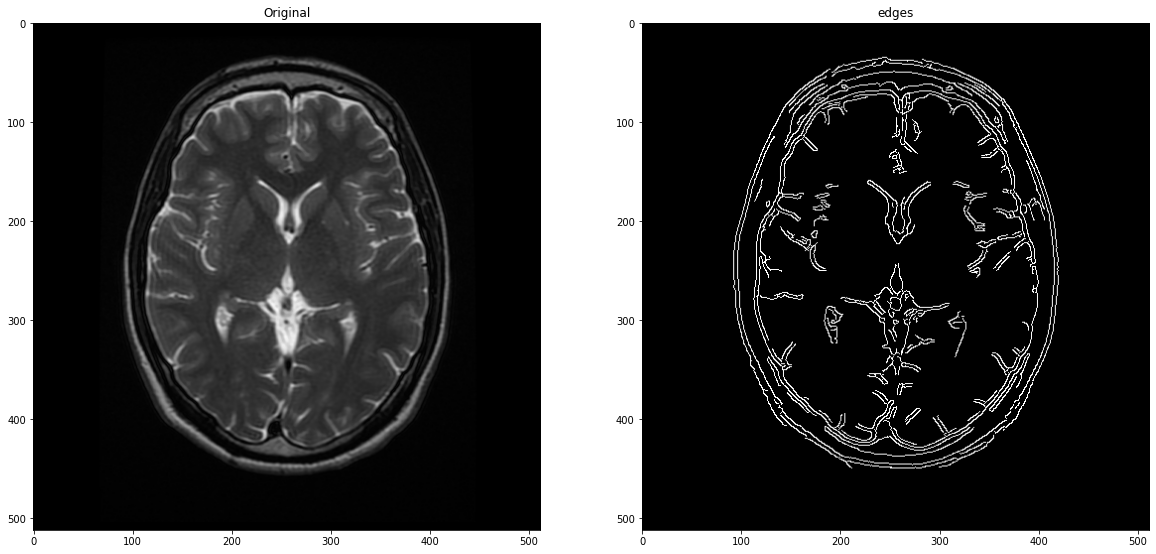

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline 

FILE_NAME = 'Images/brain_MR.jpg'
try: 
    # Read image from disk. 
    img = cv2.imread(FILE_NAME) 
    
    # Change color to RGB (from BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
    # Canny edge detection. 
    # edges = cv.Canny( image, threshold1, threshold2, edges, apertureSize, L2gradient)
    # apertureSize --> It is the size of Sobel kernel used for find image gradients. By default it is 3.
    # L2gradient --> specifies the equation for finding gradient magnitude
    edges = cv2.Canny(img, 100, 200) 
  
    # Write image back to disk. 
    # cv2.imwrite('result.jpg', edges) 
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
    ax1.set_title('Original')
    ax1.imshow(img, cmap='gray')
    ax2.set_title('edges')
    ax2.imshow(edges, cmap='gray')
    
except IOError: 
    print ('Error while reading files !!!') 

### 6. Image blurring using OpenCV

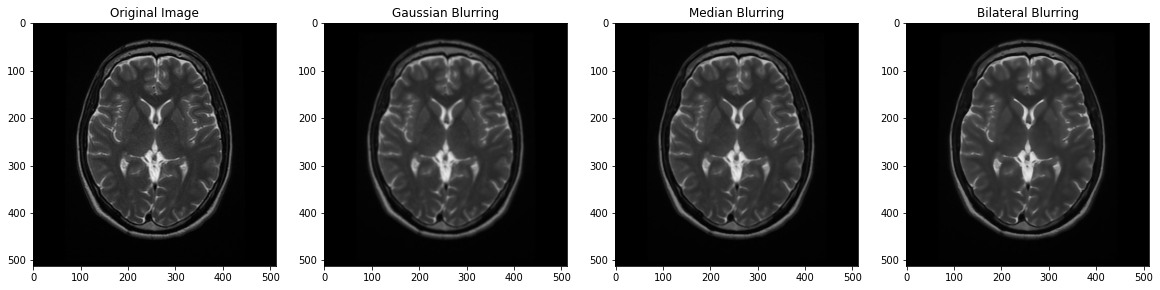

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline 
  
img = cv2.imread('Images/brain_MR.jpg') 

# Change color to RGB (from BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
cv2.imshow('Original Image', img) 
cv2.waitKey(0) 
  
# Gaussian Blur 
# GaussianBlur(src, ksize, sigmaX, dst, sigmaY, borderType)
# x' = (x - gaussian_weighted_average) / std_deviation 
# x' --> image results
Gaussian = cv2.GaussianBlur(img, (7, 7), 0) 
cv2.imshow('Gaussian Blurring', Gaussian) 
cv2.waitKey(0) 
  
# Median Blur 
# medianBlur(src, dst, ksize)
median = cv2.medianBlur(img, 5) 
cv2.imshow('Median Blurring', median) 
cv2.waitKey(0) 
  
# Bilateral Blur 
# bilateralFilter(src, d, sigmaColor, sigmaSpace, dst, borderType)
bilateral = cv2.bilateralFilter(img, 9, 75, 75) 
cv2.imshow('Bilateral Blurring', bilateral) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,20))
ax1.set_title('Original Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('Gaussian Blurring')
ax2.imshow(Gaussian, cmap='gray')
ax3.set_title('Median Blurring')
ax3.imshow(median, cmap='gray')
ax4.set_title('Bilateral Blurring')
ax4.imshow(bilateral, cmap='gray')